In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# Registro Backtest de los algoritmos de Diciembre 2022.

In [2]:
backtest_dic = pd.read_excel('Backtest_Diciembre2022.xlsx', sheet_name = 'Principal')
backtest_dic.head()

,Refrencia,Estrategia,Par,Temp.,Stop loss,Take Profit,RR,Riesgo,Balance inicial,Balance final,...,P/OP M,Periodo,Anualizado,Rend. Total,Drawdown,Profit factor,W/L,Calmar,PCT/Riesgo,Status
0,AC,52001323,EURUSD,15 min,95,129,1.357895,0.01,10000.0,11776.27,...,6.379468,3.030556,0.055433,0.177627,0.1584,1.18,0.4612,0.349955,0.009974,Espera
1,AC,52004392,EURUSD,15 min,94,51,0.542553,0.01,10000.0,13562.60,...,10.889093,3.030556,0.105782,0.356260,0.0662,1.27,0.7222,1.597916,0.015727,Activo
2,AC,52008070,EURUSD,15 min,128,41,0.320312,0.01,10000.0,11899.02,...,9.624198,3.030556,0.059050,0.189902,0.0462,1.27,0.8029,1.278147,0.014932,Activo
3,AC,52152768,EURUSD,15 min,140,71,0.507143,0.01,10000.0,12173.59,...,7.094409,3.030556,0.067053,0.217359,0.0498,1.33,0.7171,1.346437,0.015116,Activo
4,AC,52153749,EURUSD,15 min,113,33,0.292035,0.01,10000.0,12982.39,...,12.373969,3.030556,0.089943,0.298239,0.0687,1.39,0.8311,1.309219,0.014868,Activo


In [3]:
backtest_dic.shape 
# Debido a que iremos filtrando algunas de las estrategias, se tiene como referencia las dimenciones iniciales. Asimismo, 
# ya que iremos quitando algunas columnas también sirve como referencia para saber si las modificaciones se han concretado.

(33, 24)

Este registro contiene información que caracteríza a la estrategia y los resultados que tuvi durante el backtest: Estrategia,Par, Temporalidad, Stop Loss, Take Profit, Risk Reward, Riesgo por trade, Balance inicial, Balance final, Inicio y final del Test, Operaciones del sistema (OPS), Operaciones Anuales (P/OP A), Operaciones Mensuales (P/OP M), Periodo de evaluación, Anualizado (Rendimiento promedio anualizado), Rendimiento Total, Drawdown, Profit Factor, Win/Loos Ratio (W/L), Calmar, Porcentaje de Riesgo Asignado.

Aunque el objetivo que se tiene con este registro es solamente identificar los algoritmos que tengan un Calmar ≥ 1.2 y que correspondan a una temporalidad de 15 minutos, se irá preparando para utilizarla para analizar y hacer comparaciones más adelante junto con los demás registros .

## Limitar a algoritmos que solamente correspondan a la temporalidad de 15 minutos y tengan un Calmar ≥ 1.2 

In [4]:
backtest_dic['Temp.'].unique() # Comprobamos qué valores en temporalidad tienen los distintos algoritmos

array(['15 min'], dtype=object)

In [5]:
# Debido a que todos corresponden a una misma temporalidad ahora se explora la columna correspondiente 
# al Calmar para poder filtrar los sistemas hasta este punto
backtest_dic['Calmar']

0     0.349955
1     1.597916
2     1.278147
3     1.346437
4     1.309219
5     1.419339
6     1.716159
7     1.773874
8     0.884956
9     1.846861
10    1.041166
11    1.348734
12    0.580692
13    0.914743
14    0.662160
15    2.168738
16    1.782776
17    1.121572
18    0.954235
19    0.580680
20    0.715275
21    0.587548
22    0.904791
23    1.982957
24    1.887465
25    2.387286
26    1.625211
27    0.773163
28    1.270413
29    1.180000
30    0.921159
31    0.342207
32    1.074034
Name: Calmar, dtype: float64

In [6]:
backtest_dic_calmar = backtest_dic.drop(backtest_dic[backtest_dic['Calmar'] < 1.2]. index) 
# Filtramos para las estrategias que tienen un valor de Calmar menor que 1.2
backtest_dic_calmar['Calmar']

1     1.597916
2     1.278147
3     1.346437
4     1.309219
5     1.419339
6     1.716159
7     1.773874
9     1.846861
11    1.348734
15    2.168738
16    1.782776
23    1.982957
24    1.887465
25    2.387286
26    1.625211
28    1.270413
Name: Calmar, dtype: float64

In [7]:
backtest_dic_calmar.shape

(16, 24)

## Preparación de tabla de datos.

Ahora que tenemos los sistemas que tienen un Calmar mayor o igual a 1.2 y que corresponden a una temporalidad de 15 minutos, prepararemos la tabla removiendo algunas de sus columnas y esto facilite el volver a trabajar más adelante con ella.

In [8]:
backtest_dic_calmar.columns.tolist()

['Refrencia',
 'Estrategia',
 'Par',
 'Temp.',
 'Stop loss',
 'Take Profit',
 'RR',
 'Riesgo',
 'Balance inicial',
 'Balance final',
 'Inicio Test',
 'Final Test',
 'OPS',
 'P/OP A',
 'P/OP M',
 'Periodo',
 'Anualizado',
 'Rend. Total',
 'Drawdown',
 'Profit factor',
 'W/L',
 'Calmar',
 'PCT/Riesgo',
 'Status']

Se removerán las columnas que no se creen necesarias para las comparaciones qu ese harán más adelante: Referencia, temporalidad, riesgo, balance inicial, inicio y final del test, OPS, Periodo,PCT/Riesgo, Status

In [9]:
backtest_dic22 = backtest_dic_calmar.drop(['Refrencia', 'Temp.', 'Riesgo', 'Balance inicial', 'Inicio Test', 
                                       'Final Test', 'OPS', 'Periodo', 'PCT/Riesgo', 'Status'], axis = 1)
backtest_dic22.shape

(16, 14)

In [10]:
# Esta es la tabla de información final de la información que se obtiene a partir del Backtest
# Más adelante se volverá a retomar para hacer una evaluación más completa
backtest_dic22.reset_index(drop = True)
backtest_dic22

,Estrategia,Par,Stop loss,Take Profit,RR,Balance final,P/OP A,P/OP M,Anualizado,Rend. Total,Drawdown,Profit factor,W/L,Calmar
1,52004392,EURUSD,94,51,0.542553,13562.60,130.669111,10.889093,0.105782,0.356260,0.0662,1.27,0.7222,1.597916
2,52008070,EURUSD,128,41,0.320312,11899.02,115.490376,9.624198,0.059050,0.189902,0.0462,1.27,0.8029,1.278147
3,52152768,EURUSD,140,71,0.507143,12173.59,85.132906,7.094409,0.067053,0.217359,0.0498,1.33,0.7171,1.346437
4,52153749,EURUSD,113,33,0.292035,12982.39,148.487626,12.373969,0.089943,0.298239,0.0687,1.39,0.8311,1.309219
5,52156570,EURUSD,114,64,0.561404,12689.51,79.377859,6.614822,0.081612,0.268951,0.0575,1.40,0.7261,1.419339
6,52157858,EURUSD,105,38,0.361905,13805.64,155.791400,12.982617,0.112065,0.380564,0.0653,1.34,0.8055,1.716159
7,52160869,EURUSD,143,100,0.699301,12638.54,77.072278,6.422690,0.080179,0.263854,0.0452,1.47,0.6923,1.773874
9,52257301,EURUSD,112,84,0.750000,13551.15,109.350412,9.112534,0.105271,0.355115,0.0570,1.33,0.6205,1.846861
11,52259254,EURUSD,101,179,1.772277,12313.30,122.525160,10.210430,0.070943,0.231330,0.0526,1.28,0.4731,1.348734
15,62305205,EURJPY,132,83,0.628788,12920.25,86.953339,7.246112,0.088051,0.292025,0.0406,1.50,0.7197,2.168738


# Limpieza y preparación de la tabla de datos de EA Studio 

In [11]:
studio_dic22 = pd.read_excel('AlgoritmosDiciembre2022.xlsx', sheet_name = 'RegistroEAStudio')
studio_dic22.head()

,Magic,Par,Temporalidad,S.L.,T.P,R/R,R^2,P.F.,Sharpie Ratio,SQN,Max Consecutive Losses,Max Drawdown %,W/L,Montecarlo,Optimización
0,52001323,EURUSD,15 minutos,95,129,1.357895,76.09,1.41,0.16,2.22,7,0.0680,0.50,1/200,Original
1,52004392,EURUSD,15 minutos,94,51,0.542553,83.07,1.27,0.12,2.15,4,0.0514,0.72,0/200,Original
2,52008070,EURUSD,15 minutos,128,41,0.320312,83.16,1.36,0.14,2.27,3,0.0559,0.81,0/200,Original
3,52152768,EURUSD,15 minutos,140,71,0.507143,94.35,1.50,0.19,2.75,3,0.0525,0.74,44/200,Original
4,52153749,EURUSD,15 minutos,113,33,0.292035,89.33,1.47,0.16,3.18,3,0.0452,0.84,173/200,Original


In [12]:
studio_dic22.columns.tolist()

['Magic',
 'Par',
 'Temporalidad',
 'S.L.',
 'T.P',
 'R/R',
 'R^2',
 'P.F.',
 'Sharpie Ratio',
 'SQN',
 'Max Consecutive Losses',
 'Max Drawdown %',
 'W/L',
 'Montecarlo',
 'Optimización']

In [13]:
studio_dic22.shape

(33, 15)

In [14]:
studio_dic22 = studio_dic22.drop(['Sharpie Ratio', 'Optimización', 'Temporalidad'], axis = 1) # Quitamos columnas no necesarias
studio_dic22 = studio_dic22.rename(columns = {'Magic': 'Estrategia'}) # Cambiamos el nombre de Magic a Estrategia 
# para trabajar con los mismos encabezados en todas las tablas de datos
studio_dic22.head()

,Estrategia,Par,S.L.,T.P,R/R,R^2,P.F.,SQN,Max Consecutive Losses,Max Drawdown %,W/L,Montecarlo
0,52001323,EURUSD,95,129,1.357895,76.09,1.41,2.22,7,0.0680,0.50,1/200
1,52004392,EURUSD,94,51,0.542553,83.07,1.27,2.15,4,0.0514,0.72,0/200
2,52008070,EURUSD,128,41,0.320312,83.16,1.36,2.27,3,0.0559,0.81,0/200
3,52152768,EURUSD,140,71,0.507143,94.35,1.50,2.75,3,0.0525,0.74,44/200
4,52153749,EURUSD,113,33,0.292035,89.33,1.47,3.18,3,0.0452,0.84,173/200


In [15]:
studio_dic22.shape

(33, 12)

# Limpieza y preparación de la tabla de datos del VPS

In [16]:
alg_dic22_VPS = pd.read_excel('AlgoritmosDiciembre2022.xlsx', sheet_name = 'RegistroVPS', skiprows = 1 )
alg_dic22_VPS.head()

,Magic,Par,Temporalidad,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Inicio,Final
0,52004392,EURUSD,15 minutos,16,545.63,-756.41,-210.78,0.721342,0.62,0.38,54.56,-126.07,78.31,4,3,208.34,-389.79,2022-12-18,2023-02-19
1,52008070,EURUSD,15 minutos,16,338.46,-796.78,-458.32,0.424785,0.56,0.44,37.61,-113.83,72.02,4,3,149.68,-355.33,2022-12-18,2023-02-19
2,52152768,EURUSD,15 minutos,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.00,97.73,8,1,374.49,-129.64,2022-12-18,2023-03-25
3,52153749,EURUSD,15 minutos,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.92,47.24,10,3,326.69,-397.77,2022-12-18,2023-03-25
4,52156570,EURUSD,15 minutos,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.20,80.19,10,3,502.75,-399.68,2022-12-18,2023-03-25


In [17]:
alg_dic22_VPS.shape

(20, 19)

In [18]:
alg_dic22_VPS.columns.tolist()

['Magic',
 'Par',
 'Temporalidad',
 'Órdenes',
 'Beneficio bruto',
 'Pérdida bruta',
 'Beneficio Neto',
 'Factor de beneficio',
 '% Ganadas',
 '% Pérdidas',
 'Media ganancias',
 'Media de pérdidas',
 'Tiempo Medio [Horas]',
 'Consec Wins',
 'Consec Losses',
 'Consec Profit',
 'Consec Loss',
 'Inicio',
 'Final']

In [19]:
reg_VPS_dic22 = alg_dic22_VPS.drop(['Temporalidad'], axis = 1) # Retiramos la columna temporalidad
reg_VPS_dic22 = reg_VPS_dic22.rename(columns = {'Magic':'Estrategia'})
reg_VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Inicio,Final
0,52004392,EURUSD,16,545.63,-756.41,-210.78,0.721342,0.62,0.38,54.56,-126.070,78.31,4,3,208.34,-389.79,2022-12-18,2023-02-19
1,52008070,EURUSD,16,338.46,-796.78,-458.32,0.424785,0.56,0.44,37.61,-113.830,72.02,4,3,149.68,-355.33,2022-12-18,2023-02-19
2,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,2022-12-18,2023-03-25
3,52153749,EURUSD,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.920,47.24,10,3,326.69,-397.77,2022-12-18,2023-03-25
4,52156570,EURUSD,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.200,80.19,10,3,502.75,-399.68,2022-12-18,2023-03-25
5,52157858,EURUSD,22,598.37,-822.40,-224.03,0.727590,0.68,0.32,39.89,-117.490,55.91,6,2,238.19,-218.02,2022-12-18,2023-02-19
6,52160869,EURUSD,21,633.55,-913.09,-279.54,0.693853,0.62,0.38,48.73,-114.140,97.99,5,3,339.66,-287.61,2022-12-18,2023-03-18
7,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,2022-12-18,2023-03-25
8,52257958,EURUSD,17,649.27,-1094.88,-445.61,0.593006,0.47,0.53,81.16,-121.650,114.85,2,3,151.88,-390.77,2022-12-18,2023-03-24
9,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,2022-12-18,2023-03-25


In [20]:
reg_VPS_dic22['Final'] = reg_VPS_dic22['Final'].fillna('2023-03-25') # Rellenamos los datos restantes en la tabla
reg_VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Inicio,Final
0,52004392,EURUSD,16,545.63,-756.41,-210.78,0.721342,0.62,0.38,54.56,-126.070,78.31,4,3,208.34,-389.79,2022-12-18,2023-02-19
1,52008070,EURUSD,16,338.46,-796.78,-458.32,0.424785,0.56,0.44,37.61,-113.830,72.02,4,3,149.68,-355.33,2022-12-18,2023-02-19
2,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,2022-12-18,2023-03-25
3,52153749,EURUSD,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.920,47.24,10,3,326.69,-397.77,2022-12-18,2023-03-25
4,52156570,EURUSD,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.200,80.19,10,3,502.75,-399.68,2022-12-18,2023-03-25
5,52157858,EURUSD,22,598.37,-822.40,-224.03,0.727590,0.68,0.32,39.89,-117.490,55.91,6,2,238.19,-218.02,2022-12-18,2023-02-19
6,52160869,EURUSD,21,633.55,-913.09,-279.54,0.693853,0.62,0.38,48.73,-114.140,97.99,5,3,339.66,-287.61,2022-12-18,2023-03-18
7,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,2022-12-18,2023-03-25
8,52257958,EURUSD,17,649.27,-1094.88,-445.61,0.593006,0.47,0.53,81.16,-121.650,114.85,2,3,151.88,-390.77,2022-12-18,2023-03-24
9,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,2022-12-18,2023-03-25


In [21]:
reg_VPS_dic22['Inicio'] = pd.to_datetime(reg_VPS_dic22['Inicio'])
reg_VPS_dic22['Final'] = pd.to_datetime(reg_VPS_dic22['Final'])

reg_VPS_dic22['Tiempo Activo'] = (reg_VPS_dic22['Final'] - reg_VPS_dic22['Inicio']) # Añadimos una nueva columna en el que 
#se nos dice la cantidad de días que el sistema ha estado activo

VPS_dic22 = reg_VPS_dic22.drop(columns=['Inicio', 'Final'], axis = 1) # Retiramos las columnas de inicio y final debido a 
# que es más cómo visualizar el tiempo por lo días calculados en Tiempo Activo

VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo
0,52004392,EURUSD,16,545.63,-756.41,-210.78,0.721342,0.62,0.38,54.56,-126.070,78.31,4,3,208.34,-389.79,63 days
1,52008070,EURUSD,16,338.46,-796.78,-458.32,0.424785,0.56,0.44,37.61,-113.830,72.02,4,3,149.68,-355.33,63 days
2,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97 days
3,52153749,EURUSD,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.920,47.24,10,3,326.69,-397.77,97 days
4,52156570,EURUSD,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.200,80.19,10,3,502.75,-399.68,97 days
5,52157858,EURUSD,22,598.37,-822.40,-224.03,0.727590,0.68,0.32,39.89,-117.490,55.91,6,2,238.19,-218.02,63 days
6,52160869,EURUSD,21,633.55,-913.09,-279.54,0.693853,0.62,0.38,48.73,-114.140,97.99,5,3,339.66,-287.61,90 days
7,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97 days
8,52257958,EURUSD,17,649.27,-1094.88,-445.61,0.593006,0.47,0.53,81.16,-121.650,114.85,2,3,151.88,-390.77,96 days
9,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97 days


In [22]:
VPS_dic22.shape

(20, 17)

In [23]:
VPS_dic22['Tiempo Activo'].dtype

dtype('<m8[ns]')

In [24]:
# Como la columna 'Tiempo Activo' tiene un tipo de dato dtype('<m8[ns]'), tomaremos la cantidad de dias que marca
# lo convertiremos a un valor entero y lo almacenaremos en una nueva columna con el nombre 'Tiempo Activo [Días]' para recordar
# la unidad temporal en la que se está trabajando y así poder manipular más facil la tabla de datos.
dias = VPS_dic22['Tiempo Activo'].dt.days
enteros = dias.astype(int)
VPS_dic22['Tiempo Activo [Días]'] = enteros
VPS_dic22 = VPS_dic22.drop(columns = ['Tiempo Activo'], axis = 1)
VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo [Días]
0,52004392,EURUSD,16,545.63,-756.41,-210.78,0.721342,0.62,0.38,54.56,-126.070,78.31,4,3,208.34,-389.79,63
1,52008070,EURUSD,16,338.46,-796.78,-458.32,0.424785,0.56,0.44,37.61,-113.830,72.02,4,3,149.68,-355.33,63
2,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97
3,52153749,EURUSD,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.920,47.24,10,3,326.69,-397.77,97
4,52156570,EURUSD,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.200,80.19,10,3,502.75,-399.68,97
5,52157858,EURUSD,22,598.37,-822.40,-224.03,0.727590,0.68,0.32,39.89,-117.490,55.91,6,2,238.19,-218.02,63
6,52160869,EURUSD,21,633.55,-913.09,-279.54,0.693853,0.62,0.38,48.73,-114.140,97.99,5,3,339.66,-287.61,90
7,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97
8,52257958,EURUSD,17,649.27,-1094.88,-445.61,0.593006,0.47,0.53,81.16,-121.650,114.85,2,3,151.88,-390.77,96
9,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97


In [25]:
# Quitamos los algoritmos que tienen un tiempo de estar activos menor a 90 días.
VPS_dic22 =VPS_dic22.loc[VPS_dic22['Tiempo Activo [Días]'] >= 90]
VPS_dic22 = VPS_dic22.reset_index(drop = True)
VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo [Días]
0,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97
1,52153749,EURUSD,37,962.71,-1031.38,-68.67,0.933419,0.78,0.22,33.20,-128.920,47.24,10,3,326.69,-397.77,97
2,52156570,EURUSD,22,757.98,-848.43,-90.45,0.893391,0.68,0.32,50.53,-121.200,80.19,10,3,502.75,-399.68,97
3,52160869,EURUSD,21,633.55,-913.09,-279.54,0.693853,0.62,0.38,48.73,-114.140,97.99,5,3,339.66,-287.61,90
4,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97
5,52257958,EURUSD,17,649.27,-1094.88,-445.61,0.593006,0.47,0.53,81.16,-121.650,114.85,2,3,151.88,-390.77,96
6,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97
7,62310187,EURJPY,18,272.04,-392.94,-120.90,0.692319,0.44,0.56,34.00,-39.290,25.76,4,5,119.34,-155.79,90
8,54004491,USDJPY,54,2686.54,-2544.13,142.41,1.055976,0.48,0.52,103.33,-90.860,22.03,4,4,380.82,-456.87,97
9,54006850,USDJPY,30,1065.73,-1931.78,-866.05,0.551683,0.30,0.70,118.87,-91.990,39.35,2,10,245.77,-958.94,99


In [26]:
VPS_dic22 = VPS_dic22.drop(VPS_dic22[VPS_dic22['Factor de beneficio'] < 1.0].index)
VPS_dic22.set_index('Estrategia')
VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo [Días]
0,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97
4,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97
6,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97
8,54004491,USDJPY,54,2686.54,-2544.13,142.41,1.055976,0.48,0.52,103.33,-90.860,22.03,4,4,380.82,-456.87,97
10,54009002,USDJPY,72,2360.35,-2026.44,333.91,1.164777,0.57,0.43,57.57,-65.370,12.37,6,5,310.70,-372.01,97
11,54010866,USDJPY,30,2075.12,-769.17,1305.95,2.697869,0.70,0.30,92.82,-85.460,15.82,8,3,645.93,-267.99,97
12,54018086,USDJPY,56,1480.83,-1094.17,386.66,1.353382,0.79,0.21,33.66,-91.180,14.09,9,2,349.28,190.33,97
13,54137257,USDJPY,78,2160.12,-1597.89,562.23,1.351858,0.59,0.41,46.96,-49.930,24.91,5,3,254.23,-215.00,97
14,54143486,USDJPY,97,2123.83,-1842.58,281.25,1.152639,0.79,0.21,27.45,-92.130,18.79,10,2,261.38,-217.84,97


# Tablas finales:  VPS, EA Studio, Backtest

In [27]:
# VPS
VPS_dic22

,Estrategia,Par,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo [Días]
0,52152768,EURUSD,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97
4,52257301,EURUSD,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97
6,52259254,EURUSD,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97
8,54004491,USDJPY,54,2686.54,-2544.13,142.41,1.055976,0.48,0.52,103.33,-90.860,22.03,4,4,380.82,-456.87,97
10,54009002,USDJPY,72,2360.35,-2026.44,333.91,1.164777,0.57,0.43,57.57,-65.370,12.37,6,5,310.70,-372.01,97
11,54010866,USDJPY,30,2075.12,-769.17,1305.95,2.697869,0.70,0.30,92.82,-85.460,15.82,8,3,645.93,-267.99,97
12,54018086,USDJPY,56,1480.83,-1094.17,386.66,1.353382,0.79,0.21,33.66,-91.180,14.09,9,2,349.28,190.33,97
13,54137257,USDJPY,78,2160.12,-1597.89,562.23,1.351858,0.59,0.41,46.96,-49.930,24.91,5,3,254.23,-215.00,97
14,54143486,USDJPY,97,2123.83,-1842.58,281.25,1.152639,0.79,0.21,27.45,-92.130,18.79,10,2,261.38,-217.84,97


In [28]:
# Back Test
backtest_dic22

,Estrategia,Par,Stop loss,Take Profit,RR,Balance final,P/OP A,P/OP M,Anualizado,Rend. Total,Drawdown,Profit factor,W/L,Calmar
1,52004392,EURUSD,94,51,0.542553,13562.60,130.669111,10.889093,0.105782,0.356260,0.0662,1.27,0.7222,1.597916
2,52008070,EURUSD,128,41,0.320312,11899.02,115.490376,9.624198,0.059050,0.189902,0.0462,1.27,0.8029,1.278147
3,52152768,EURUSD,140,71,0.507143,12173.59,85.132906,7.094409,0.067053,0.217359,0.0498,1.33,0.7171,1.346437
4,52153749,EURUSD,113,33,0.292035,12982.39,148.487626,12.373969,0.089943,0.298239,0.0687,1.39,0.8311,1.309219
5,52156570,EURUSD,114,64,0.561404,12689.51,79.377859,6.614822,0.081612,0.268951,0.0575,1.40,0.7261,1.419339
6,52157858,EURUSD,105,38,0.361905,13805.64,155.791400,12.982617,0.112065,0.380564,0.0653,1.34,0.8055,1.716159
7,52160869,EURUSD,143,100,0.699301,12638.54,77.072278,6.422690,0.080179,0.263854,0.0452,1.47,0.6923,1.773874
9,52257301,EURUSD,112,84,0.750000,13551.15,109.350412,9.112534,0.105271,0.355115,0.0570,1.33,0.6205,1.846861
11,52259254,EURUSD,101,179,1.772277,12313.30,122.525160,10.210430,0.070943,0.231330,0.0526,1.28,0.4731,1.348734
15,62305205,EURJPY,132,83,0.628788,12920.25,86.953339,7.246112,0.088051,0.292025,0.0406,1.50,0.7197,2.168738


In [29]:
# EA Studio
studio_dic22

,Estrategia,Par,S.L.,T.P,R/R,R^2,P.F.,SQN,Max Consecutive Losses,Max Drawdown %,W/L,Montecarlo
0,52001323,EURUSD,95,129,1.357895,76.09,1.41,2.22,7,0.0680,0.50,1/200
1,52004392,EURUSD,94,51,0.542553,83.07,1.27,2.15,4,0.0514,0.72,0/200
2,52008070,EURUSD,128,41,0.320312,83.16,1.36,2.27,3,0.0559,0.81,0/200
3,52152768,EURUSD,140,71,0.507143,94.35,1.50,2.75,3,0.0525,0.74,44/200
4,52153749,EURUSD,113,33,0.292035,89.33,1.47,3.18,3,0.0452,0.84,173/200
5,52156570,EURUSD,114,64,0.561404,84.49,1.56,3.04,3,0.0562,0.75,95/200
6,52157858,EURUSD,105,38,0.361905,76.93,1.34,2.58,5,0.0547,0.80,0/200
7,52160869,EURUSD,143,100,0.699301,93.19,1.47,2.37,4,0.0594,0.69,7/200
8,52161868,EURUSD,114,94,0.824561,87.58,1.29,1.71,3,0.0615,0.66,26/200
9,52257301,EURUSD,112,84,0.750000,72.63,1.41,2.70,5,0.0548,0.63,8/200


# Análisis de Resultados

## Comparación tabla de datos EA Studio contra tabla de datos VPS

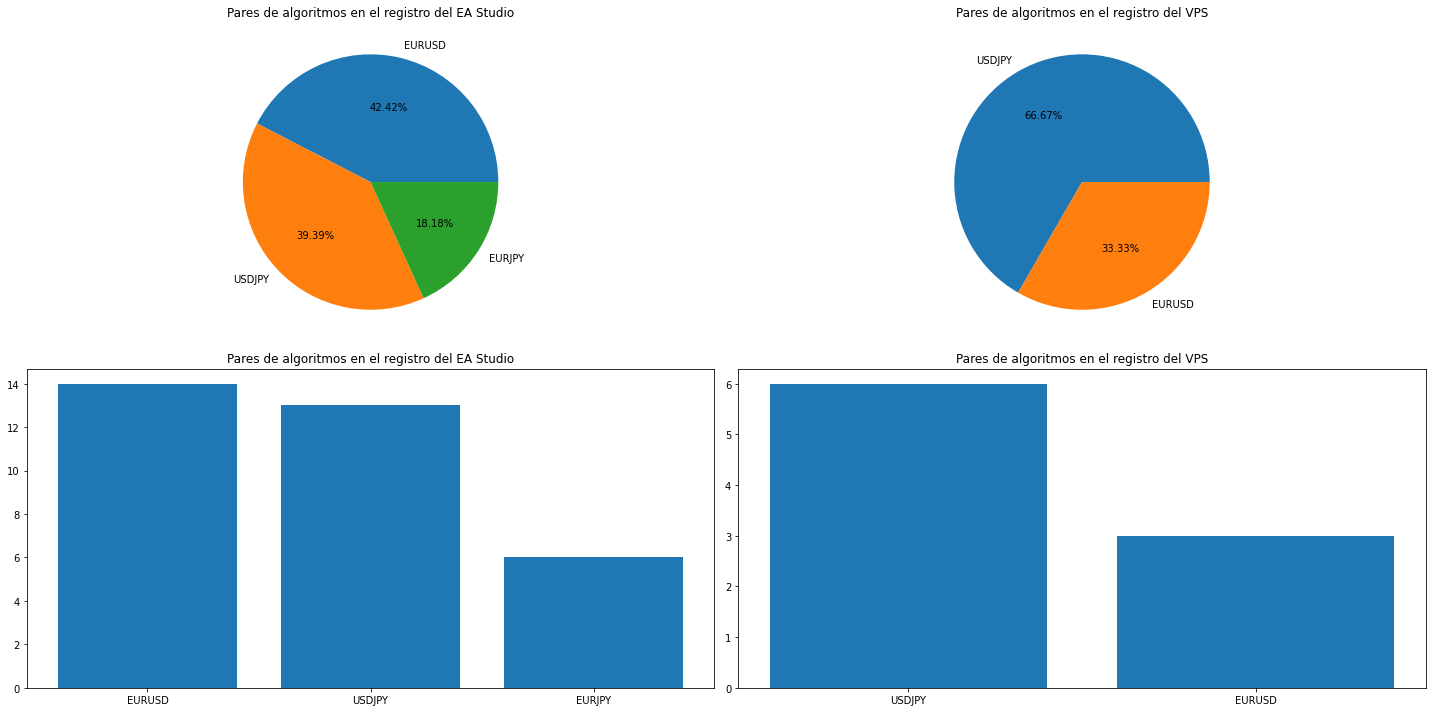

In [35]:
pares_studio = studio_dic22['Par'].value_counts() # Conteo de los distintos pares en la tabla de datos del EA Studio
pares_VPS = VPS_dic22['Par'].value_counts() # Conteo de los distintos pares en la tabbla de datos del VPS

fig, axs = plt.subplots(2,2, figsize = (20,10)) 

# Gráfica de Pie y de barras de EA Studio
axs[0,0].pie(pares_studio.values, labels=pares_studio.index, autopct='%1.2f%%')
axs[0,0].set_title('Pares de algoritmos en el registro del EA Studio')

axs[1,0].bar(pares_studio.index, pares_studio.values)
axs[1,0].set_title('Pares de algoritmos en el registro del EA Studio')

# Gráfica de Pie y de barras del VPS
axs[0,1].pie(pares_VPS.values, labels = pares_VPS.index, autopct = '%1.2f%%')
axs[0,1].set_title('Pares de algoritmos en el registro del VPS')

axs[1,1].bar(pares_VPS.index, pares_VPS.values)
axs[1,1].set_title('Pares de algoritmos en el registro del VPS')

plt.tight_layout()
plt.show()

La hoja de datos respectiva a EA Studio, representa el inicio de los registros de los algoritmos, es en la que se toman los datos de los sistemas acorde a la información que se obtuvo al generarlos en la página que se usó, por otra parte, la hoja de datos del VPS solamente alberga la información de los sistemas que después de haber pasado por el Backtest y después de haber estado funcionando con información en tiempo real han tenido un buen desempeño.

Como podemos ver, lo que inicio siendo un registro de sistemas en tres pares EURUSD, USDJPY y EURJPY terminó por solamente dar resultados en 2, es aquí donde se pueden plantear preguntas de análisis para siguientes búsquedas de algoritmos sobre el par EUJPY con el objetivo de optimizarlas y poder generar sistemas más robustos.

Ahora, el objetivo es poder realizar un análisis únicamente sobre los algoritmos del registro del VPS para escoger los sistemas de mejor desempeño basandonos en los registros tanto del VPS como del Backtest y del EA Studio, para, finalmente, poder sumarlos a una cartera de algoritmos para que realicen operaciones en una cuenta real.

Se establece la reestricción de que en la cartera de algoritmos solamente puede haber un máximo de 2 sistemas por parte de operación.

## Analisis de los sistemas.

In [39]:
# Primero separaremos los pares en EURUSD y USDJPY del registro del VPS
eurusd_VPS_dic22 = VPS_dic22.loc[VPS_dic22['Par'] == 'EURUSD'] # Sistemas en el par EURUSD
usdjpy_VPS_dic22 = VPS_dic22.loc[VPS_dic22['Par'] == 'USDJPY'] # Sistemas en el par USDJPY

### EURUSD

In [45]:
# VPS
eurusd_VPS = eurusd_VPS_dic22.drop(columns = ['Par'], axis = 1) # Podemos retirar la columna de par debido a que sabemos
# que las estrategias son únicamente sobre el par EURUSD
eurusd_VPS

,Estrategia,Órdenes,Beneficio bruto,Pérdida bruta,Beneficio Neto,Factor de beneficio,% Ganadas,% Pérdidas,Media ganancias,Media de pérdidas,Tiempo Medio [Horas],Consec Wins,Consec Losses,Consec Profit,Consec Loss,Tiempo Activo [Días]
0,52152768,23,980.77,-495.99,484.78,1.977399,0.83,0.17,51.62,-124.000,97.73,8,1,374.49,-129.64,97
4,52257301,30,1221.33,-1210.98,10.35,1.008547,0.57,0.43,71.84,-93.150,75.46,3,3,242.24,-229.02,97
6,52259254,20,1027.02,-660.32,366.70,1.555337,0.45,0.55,114.11,-60.013,106.92,2,3,431.29,-263.34,97


In [57]:
# EA Studio
eurusd_studio = studio_dic22.loc[studio_dic22['Par'] == 'EURUSD'] # Filtramos solamente las estrategias de EURUSD
eurusd_studio = eurusd_studio.drop(columns = ['Par'], axis = 1) # Retiramos la columna 'Par'

# Igualamos las estrategias que hay en la tabla de EA Studio a las estrategias que hay en la tabla del VPS
estrategias_VPS = eurusd_VPS['Estrategia'].unique() # Identificamos los valores únicos de la tabla del VPS

eurusd_studio_VPS = pd.DataFrame() # Generamos una nueva tabla de datos en la que solo esten las estrategias
# que coinciden entre el EA Studio y el VPS
for estrategia in estrategias_VPS:
    temp_df = eurusd_studio.loc[eurusd_studio['Estrategia'] == estrategia]
    eurusd_studio_VPS = pd.concat([eurusd_studio_VPS, temp_df])
    

eurusd_studio_VPS

,Estrategia,S.L.,T.P,R/R,R^2,P.F.,SQN,Max Consecutive Losses,Max Drawdown %,W/L,Montecarlo
3,52152768,140,71,0.507143,94.35,1.50,2.75,3,0.0525,0.74,44/200
9,52257301,112,84,0.750000,72.63,1.41,2.70,5,0.0548,0.63,8/200
11,52259254,101,179,1.772277,82.52,1.36,1.69,6,0.0532,0.49,0/200


In [59]:
# Back Test
eurusd_backtest = backtest_dic22.loc[backtest_dic22['Par'] == 'EURUSD'] # Filtramos solamente las estrategias del EURUSD
eurusd_backtest = eurusd_backtest.drop(columns = ['Par'], axis = 1) # Retiramos la columna 'Par'

# Igualamos las estrategias que hay en la tabla Backtest a las estrategias que hay en la tabla VPS
eurusd_backtest_VPS = pd.DataFrame()
for estrategia in estrategias_VPS:
    temp_df = eurusd_backtest.loc[eurusd_backtest['Estrategia'] == estrategia]
    eurusd_backtest_VPS = pd.concat([eurusd_backtest_VPS, temp_df])
    
eurusd_backtest_VPS

,Estrategia,Stop loss,Take Profit,RR,Balance final,P/OP A,P/OP M,Anualizado,Rend. Total,Drawdown,Profit factor,W/L,Calmar
3,52152768,140,71,0.507143,12173.59,85.132906,7.094409,0.067053,0.217359,0.0498,1.33,0.7171,1.346437
9,52257301,112,84,0.750000,13551.15,109.350412,9.112534,0.105271,0.355115,0.0570,1.33,0.6205,1.846861
11,52259254,101,179,1.772277,12313.30,122.525160,10.210430,0.070943,0.231330,0.0526,1.28,0.4731,1.348734
